<a href="https://colab.research.google.com/github/ferreiraluisa/faculdade/blob/main/luisa102026lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapa de Karnaugh

Recomendamos os slides
* [Introdução aos Mapas](https://docs.google.com/presentation/d/e/2PACX-1vQZybnIntBeK-znAVhrvO4cm2Zfg8UbY5ZFBiC0lIC4942eoqi7PTeQrAOb3HFU6vIld5Iv88YIWbOi/pub?start=false&loop=false&delayms=3000)

Apostilas
* [Circuitos Combinacionais - Prof. Guntzel](http://www.inf.ufsc.br/~j.guntzel/isd/isd3.pdf)


## Ferramentas Online

* [Visualizar o mapa e as equações](https://www.mathematik.uni-marburg.de/~thormae/lectures/ti1/code/karnaughmap/)

* [Entrar com os mintermos, visualizar mapa, equações em Verilog](https://www.charlie-coleman.com/experiments/kmap/)

# Instalar Plugin para Verilog

Executar o comando abaixo.

In [ ]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin
#!chmod a+x -R /content/nvcc4jupyter/verilog/

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-aqrotry9
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-aqrotry9
  Created wheel for ColabPlugin: filename=ColabPlugin-0.0.3-cp36-none-any.whl size=10923 sha256=d84d55b5bf98fc7bc431be1342e02e627f9132f00c6a9568c1512aa7b7e74cf8
  Stored in directory: /tmp/pip-ephem-wheel-cache-9oqfkglb/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (361/361), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 361 (delta 157), reused 282 (delta 82), pack-reused 0
Receiving objects: 100% (361/361), 27.65 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (157/157), done.
created output directory at /content/src
Out bin /content/result.out


# X+3 com 4 bits

Considerando apenas números positivos com 4 bits de 0 a 15, ao fazer X+3 teremos de 3 a 18. Portanto, 16,17 e 18 não poderão ser representados se a saída for de apenas 4 bits. As entradas 13,14 e 15 irão ser condições de Don't Care. 

Linha | X  | S=X+3 | $S_3 S_2 S_1 S_0$
---   |--- | --- | ---
0 | 0 | 3 | $0 0 1 1$
1 | 1 | 4 | $0100$
2 | 2 | 5 | $0101$
3 | 3 | 6 | $0110$
4 | 4 | 7 | $0111$
5 | 5 | 8 | $1000$
6 | 6 | 9 | $1001$
7 | 7 | 10 | $1010$
8 | 8 | 11 | $1011$
9 | 9 | 12 | $1100$
10 | 10 | 13 | $1101$
11 | 11 | 14 | $1110$
12 | 12 | 15 | $1111$
13 | 13 | 16 | $XXXX$
14 | 14 | 17 | $XXXX$
14 | 15 | 18 | $XXXX$

>$S_3=5,6,7,8,9,10,11,12$

>$S_2=1,2,3,4,9,10,11,12$

>$S_1=0,3,4,7,8,11,12$

>$S_0=0,2,4,6,8,10,12$



In [ ]:
%%verilog
module test(x, s,S);
input [3:0] x; 
output [3:0] s;
output [3:0] S;
assign S = x+3; // Alto Nivel para conferir
assign s[3] = (x[2] & x[0]) | (x[2] & x[1]) | (x[3]);
assign s[2] = (~x[2] & x[0]) | (~x[2] & x[1]) | (x[2] & ~x[1] & ~x[0]);
assign s[1] = (~x[1] & ~x[0]) | (x[1] & x[0]);
assign s[0] = (~x[0]);
endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [3:0] s,S;

integer k;
	test t(counter[3:0],s,S); 
	initial begin
		$display(" X  |  s   S");
		$monitor("%d  | %d  %d", counter[3:0], s,S);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

 X  |  s   S
 0  |  3   3
 1  |  4   4
 2  |  5   5
 3  |  6   6
 4  |  7   7
 5  |  8   8
 6  |  9   9
 7  | 10  10
 8  | 11  11
 9  | 12  12
10  | 13  13
11  | 14  14
12  | 15  15
13  |  8   0
14  |  9   1
15  | 10   2



# Exercicio 1

Preencher a tabela con Dont Care para a função X*3 com entrada de 4 bits e saída de 5 bits. Completar a tabela abaixo com as 16 linhas (sem usar ...). 

Linha | X  | S=X*3 | $S_4 S_3 S_2 S_1 S_0$
---   |--- | --- | ---
0 | 0 | 0 | $00000$
1 | 1 | 3 | $00011$
2 | 2 | 6 | $00110$
3 | 3 | 9 | $01001$
4 | 4 | 12 | $01100$
5 | 5 | 15 | $01111$
6 | 6 | 18 | $10010$
7 | 7 | 21 | $10101$
8 | 8 | 24 | $11000$
9 | 9 | 27 | $11011$
10 | 10 | 30 | $11110$
11 | 11 | 33 | $XXXXX$
12 | 12 | 36 | $XXXXX$
13 | 13 | 39 | $XXXXX$
14 | 14 | 42 | $XXXXX$
15| 15 | 45  | $XXXXX$


## Parte II do Exercício 1

Escrever os mintermos para as 5 funções de saída:

> $S_4 = 6,7,8,9,10 $

> $S_3 = 3,4,5,8,9,10 $

> $S_2 = 2,4,5,7,10 $

> $S_1 = 1,2,5,6,9,10$

> $S_0 = 1,3,5,7,9$




## Parte III do Ex. 1

Fazer a implementação em Verilog. 


In [ ]:
%%verilog
module test(x, s,S);
input [3:0] x; 
output [4:0] s;
output [4:0] S;
assign S = x*3; // Alto Nivel para conferir
assign s[4] = (x[2] & x[1]) | (x[3]);
assign s[3] = (~x[2] & x[1] & x[0]) | (x[2] & ~x[1]) | (x[3]);
assign s[2] = (~x[2] & x[1] & ~x[0]) | (x[2] & ~x[1]) | (x[2] & x[0]);
assign s[1] = (~x[1] & x[0]) | (x[1] & ~x[0]);
assign s[0] = (x[0]);
endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [4:0] s,S;

integer k;
	test t(counter[3:0],s,S); 
	initial begin
		$display(" X  |  s   S");
		$monitor("%d  | %d  %d", counter[3:0], s,S);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

 X  |  s   S
 0  |  0   0
 1  |  3   3
 2  |  6   6
 3  |  9   9
 4  | 12  12
 5  | 15  15
 6  | 18  18
 7  | 21  21
 8  | 24  24
 9  | 27  27
10  | 30  30
11  | 25   1
12  | 28   4
13  | 31   7
14  | 26  10
15  | 29  13



# Exercicio 2

Preencher a tabela con Dont Care para a função X * D com entrada de 4 bits e saída de 6 bits, onde D é seu ultimo digito de matrícula. Se o seu último dígito for 0, fazer X * 5, se for 1 fazer X * 6, se for 3 fazer X * 7.
  Completar a tabela abaixo com as 16 linhas (sem usar ...).
  \minha matricula:102026 

Linha | X  | S=X*6 | $S_5 S_4 S_3 S_2 S_1 S_0$
---   |--- | --- | ---
0 | 0 | 0 | $000000$
1 | 1 | 6 | $000110$
2 | 2 | 12 | $010010$
3 | 3 | 18 | $010010$
4 | 4 | 24 | $011000$
5 | 5 | 30 | $011110$
6 | 6 | 36 | $100100$
7 | 7 | 42 | $101010$
8 | 8 | 48 | $110000$
9 | 9 | 54 | $110110$
10 | 10 | 60 | $111100$
11 | 11 | 66 | $XXXXXX$
12 | 12 | 72 | $XXXXXX$
13 | 13 | 78 | $XXXXXX$ 
14 | 14 | 84 | $XXXXXX$
15 | 15 | 90 | $XXXXXX$


## Parte II do Exercício 2

Escrever os mintermos para as 6 funções de saída:

> $S_5 = 6,7,8,9,10$

> $S_4 = 3,4,5,8,9,10$

> $S_3 = 2,4,5,7,10$

> $S_2 = 1,2,5,6,9,10$

> $S_1 = 1,3,5,7,9$

> $S_0 = nenhum$




## Parte III do Ex. 2

Fazer a implementação em Verilog. 


In [ ]:
%%verilog
module test(x, s,S);
input [3:0] x; 
output [5:0] s;
output [5:0] S;
assign S = x*6; // Substituir com seu DIGITO DE MATRICULA !
assign s[5] = (x[2] & x[1]) | (x[3]);
assign s[4] = (~x[2] & x[1] & x[0]) | (x[2] & ~x[1]) | (x[3]);
assign s[3] = (~x[2] & x[1] & ~x[0]) | (x[2] & ~x[1]) | (x[2] & x[0]);
assign s[2] = (~x[1] & x[0]) | (x[1] & ~x[0]);
assign s[1] = (x[0]);
assign s[0] = 0;


endmodule



module logic_testbench();  // Esta parte do codigo é para gerar os 16 valores
reg [3:0] counter;
wire [5:0] s,S;

integer k;
	test t(counter[3:0],s,S); 
	initial begin
		$display(" X  |  s   S");
		$monitor("%d  | %d  %d", counter[3:0], s,S);
		counter = 0;
		for (k=1; k<16; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

 X  |  s   S
 0  |  0   0
 1  |  6   6
 2  | 12  12
 3  | 18  18
 4  | 24  24
 5  | 30  30
 6  | 36  36
 7  | 42  42
 8  | 48  48
 9  | 54  54
10  | 60  60
11  | 50   2
12  | 56   8
13  | 62  14
14  | 52  20
15  | 58  26



# Comparador Bitslice Esq -> Dir
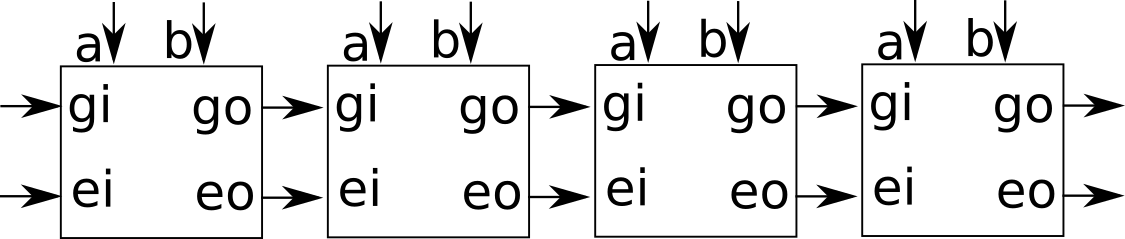

## tabela

G = greater, E = Equal, só precisa de 2

* g=1, e=0 A > B
* g=0, e=1 A == B
* g=0, e=0 A < B
* g=1, e=1 DONT CARE, nunca ocorre

Propaga da esquerda para direita, se for maior ou menor continua maior ou menor, não depende do a e b local. Se for igual (começa igual), depende do a e b local. 

linha |gi | ei | a | b | go | eo | Comentários
--- | --- | --- | --- | --- | --- | --- | ---
0 | 0 | 0 | 0 | 0 | 0   |  0  | se é menor continua...
1 | 0 | 0 | 0 | 1 | 0   |  0 
2 | 0 | 0 | 1 | 0 | 0   |  0 
3 | 0 | 0 | 1 | 1 | 0   |  0 
4 | 0 | 1 | 0 | 0 | 0   |  1  | continua igual 
5 | 0 | 1 | 0 | 1 | 0   |  0 | passa a ser menor
6 | 0 | 1 | 1 | 0 | 1   |  0 | passa a ser maior
7 | 0 | 1 | 1 | 1 | 0   |  1  | continua igual 
8 | 1 | 0 | 0 | 0 | 1   |  0  | se é maior continua...
9 | 1 | 0 | 0 | 1 | 1   |  0 
10 | 1 | 0 | 1 | 0 | 1   |  0 
11 | 1 | 0 | 1 | 1 | 1   |  0 
12-15 | 1 | 1 | X | X | **X**  |  **X** | não depende de A e B





## Mintermos

> $go = 6, 8,9,10,11$

> $eo = 4,7$

> $dont care= 12,13,14,15$

In [ ]:
%%verilog
module test(a, b, g,e, G,E);
input [3:0] a,b; 
output g,e,G,E;
// alto nivel
assign G = a>b;
assign E = a == b;
// com modulos
wire [3:0] gi,ei;
comp M3(a[3],b[3],1'b0,1'b1,gi[3],ei[3]);
comp M2(a[2],b[2],gi[3],ei[3],gi[2],ei[2]);
comp M1(a[1],b[1],gi[2],ei[2],gi[1],ei[1]);
comp M0(a[0],b[0],gi[1],ei[1],g,e);

endmodule

module comp(a,b,gi,ei,go,eo);
input a,b,gi,ei;
output go,eo;
assign go = (ei & a & ~b) | (gi);
assign eo = (ei & ~a & ~b) | (ei & a & b);
endmodule

module logic_testbench();  
reg [7:0] counter;
wire g,e,G,E;

integer k;
	test t(counter[7:4],counter[3:0],g,e,G,E); 
	initial begin
		$display(" a   b |  g e G E");
		$monitor("%d  %d |  %b %b %b %b ", counter[7:4], counter[3:0], g,e,G,E);
		counter = 0;
		for (k=1; k<256; k=k+1)
	  begin
     #1 counter = k;
     if ( g !== G || e !== E ) $display("Falha ! a=%d b=%d maior %b %b igual %b %b",counter[7:4], counter[3:0], g,G,e,E);
		end
		$finish;
	end
endmodule

 a   b |  g e G E
 0   0 |  0 1 0 1 
 0   1 |  0 0 0 0 
 0   2 |  0 0 0 0 
 0   3 |  0 0 0 0 
 0   4 |  0 0 0 0 
 0   5 |  0 0 0 0 
 0   6 |  0 0 0 0 
 0   7 |  0 0 0 0 
 0   8 |  0 0 0 0 
 0   9 |  0 0 0 0 
 0  10 |  0 0 0 0 
 0  11 |  0 0 0 0 
 0  12 |  0 0 0 0 
 0  13 |  0 0 0 0 
 0  14 |  0 0 0 0 
 0  15 |  0 0 0 0 
 1   0 |  1 0 1 0 
 1   1 |  0 1 0 1 
 1   2 |  0 0 0 0 
 1   3 |  0 0 0 0 
 1   4 |  0 0 0 0 
 1   5 |  0 0 0 0 
 1   6 |  0 0 0 0 
 1   7 |  0 0 0 0 
 1   8 |  0 0 0 0 
 1   9 |  0 0 0 0 
 1  10 |  0 0 0 0 
 1  11 |  0 0 0 0 
 1  12 |  0 0 0 0 
 1  13 |  0 0 0 0 
 1  14 |  0 0 0 0 
 1  15 |  0 0 0 0 
 2   0 |  1 0 1 0 
 2   1 |  1 0 1 0 
 2   2 |  0 1 0 1 
 2   3 |  0 0 0 0 
 2   4 |  0 0 0 0 
 2   5 |  0 0 0 0 
 2   6 |  0 0 0 0 
 2   7 |  0 0 0 0 
 2   8 |  0 0 0 0 
 2   9 |  0 0 0 0 
 2  10 |  0 0 0 0 
 2  11 |  0 0 0 0 
 2  12 |  0 0 0 0 
 2  13 |  0 0 0 0 
 2  14 |  0 0 0 0 
 2  15 |  0 0 0 0 
 3   0 |  1 0 1 0 
 3   1 |  1 0 1 0 
 3   2 |  1 0 1 0 
 3   3 |  0 1

# Exercicio 3

Faça o projeto de um bit-slice para comparador Dir → Esq. Qual o custo por bit ?  Desenhar o circuito. Implementar um modulo de 1 bit em Verilog. Implementar um modulo com 4 bits. Comparar com a versão em alto nível $A > B, A==B, A<B$.
Usar apenas 2 bits para propagar G=1,E=0 (Maior), G=0,E=1 (Igual) e G=0,E=0 (Menor). 

Exemplo de 8 bits, fazer apenas com 4 bits.

![figura](https://learn.digilentinc.com/Documents/Digital/BT06_01_Comparators/Comp_BusCompare.svg)

## Parte I - Tabela

Preencher a tabela com Dont Care. Suponha gti=0,eqi=0 como sendo Menor, gti=1,eqi=1 como dontcare

Linha | gti | eqi | a | b | gto | eqo
---   |--- | --- | --- | --- | --- | --- 
0     | 0  | 0   | 0  | 0  | 0  | 0 |
1     | 0  | 0   | 0  | 1  | 0  | 0
2     | 0  | 0   | 1  | 0  | 1  | 0
3     | 0  | 0   | 1  | 1  | 0  | 0
4     | 0  | 1   | 0  | 0  | 0  | 1
5     | 0  | 1   | 0  | 1  | 0  | 0
6     | 0  | 1   | 1  | 0  | 1  | 0
7     | 0  | 1   | 1  | 1  | 0  | 1
8     | 1  | 0   | 0  | 0  | 1  | 0
9     | 1  | 0   | 0  | 1  | 0  | 0
10    | 1  | 0   | 1  | 0  | 1  | 0
11    | 1  | 0   | 1  | 1  | 1  | 0
12    | 1  | 1   | 0  | 0  | x  | x
13    | 1  | 1   | 0  | 1  | x  | x 
14    | 1  | 1   | 1  | 0  | x  | x  
15    | 1  | 1   | 1  | 1  | x  | x


## Parte II - Minttermos

Mintermos 

> $gto =2,6,8,10,11 $

> $eqo =4,7 $

> $dontcare =12,13,14,15 $


## Parte III - Código Verilog

In [ ]:
%%verilog
module test(a, b, g,e, G,E);
input [3:0] a,b; 
output g,e,G,E;
assign G = a>b;
assign E = a == b;
// Completar AQUI....com modulos
wire [3:0] gti, eqi;
comp M0(a[0],b[0],1'b0,1'b1,gti[3],eqi[3]);
comp M1(a[1],b[1],gti[3],eqi[3],gti[2],eqi[2]);
comp M2(a[2],b[2],gti[2],eqi[2],gti[1],eqi[1]);
comp M3(a[3],b[3],gti[1],eqi[1],g,e);
endmodule

module comp(a,b,gti,eqi,gto,eqo);
input a,b,gti,eqi;
output gto,eqo;
assign gto = (a & ~b) | (gti & ~b) | (gti & a);
assign eqo = (eqi & ~a & ~b) | (eqi & a & b);
endmodule

module logic_testbench();  
reg [7:0] counter;
wire g,e,G,E;

integer k;
	test t(counter[7:4],counter[3:0],g,e,G,E); 
	initial begin
		$display(" a   b |  g e G E");
		$monitor("%d  %d |  %b %b %b %b ", counter[7:4], counter[3:0], g,e,G,E);
		counter = 0;
		for (k=1; k<256; k=k+1)
     begin
     #1 counter = k;
     if ( g !== G || e !== E ) $display("Falha ! a=%d b=%d maior %b %b igual %b %b",counter[7:4], counter[3:0], g,G,e,E);
		end
		$finish;
	end
endmodule

 a   b |  g e G E
 0   0 |  0 1 0 1 
 0   1 |  0 0 0 0 
 0   2 |  0 0 0 0 
 0   3 |  0 0 0 0 
 0   4 |  0 0 0 0 
 0   5 |  0 0 0 0 
 0   6 |  0 0 0 0 
 0   7 |  0 0 0 0 
 0   8 |  0 0 0 0 
 0   9 |  0 0 0 0 
 0  10 |  0 0 0 0 
 0  11 |  0 0 0 0 
 0  12 |  0 0 0 0 
 0  13 |  0 0 0 0 
 0  14 |  0 0 0 0 
 0  15 |  0 0 0 0 
 1   0 |  1 0 1 0 
 1   1 |  0 1 0 1 
 1   2 |  0 0 0 0 
 1   3 |  0 0 0 0 
 1   4 |  0 0 0 0 
 1   5 |  0 0 0 0 
 1   6 |  0 0 0 0 
 1   7 |  0 0 0 0 
 1   8 |  0 0 0 0 
 1   9 |  0 0 0 0 
 1  10 |  0 0 0 0 
 1  11 |  0 0 0 0 
 1  12 |  0 0 0 0 
 1  13 |  0 0 0 0 
 1  14 |  0 0 0 0 
 1  15 |  0 0 0 0 
 2   0 |  1 0 1 0 
 2   1 |  1 0 1 0 
 2   2 |  0 1 0 1 
 2   3 |  0 0 0 0 
 2   4 |  0 0 0 0 
 2   5 |  0 0 0 0 
 2   6 |  0 0 0 0 
 2   7 |  0 0 0 0 
 2   8 |  0 0 0 0 
 2   9 |  0 0 0 0 
 2  10 |  0 0 0 0 
 2  11 |  0 0 0 0 
 2  12 |  0 0 0 0 
 2  13 |  0 0 0 0 
 2  14 |  0 0 0 0 
 2  15 |  0 0 0 0 
 3   0 |  1 0 1 0 
 3   1 |  1 0 1 0 
 3   2 |  1 0 1 0 
 3   3 |  0 1